In [1]:
#import the packages
import pandas as pd
import numpy as np
from datetime import date
import yfinance as yf
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import ta

In [8]:
today = date.today()
ticker1 = 'QQQ' 
start_date = '2024-08-14'
end = today
df = yf.download(ticker1, interval='15m', start=start_date)
df['RSI'] = ta.momentum.rsi(df.Close, window=14)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,RSI
Datetime,,,,,,,
2024-08-14 09:30:00,463.500000,464.429993,461.234985,461.429993,461.429993,4942405,NaN
2024-08-14 09:45:00,461.459991,462.720001,460.480011,460.890015,460.890015,2329165,NaN
2024-08-14 10:00:00,460.929993,461.500000,459.380005,459.869995,459.869995,2014920,NaN
2024-08-14 10:15:00,459.880005,460.614990,459.410004,460.394989,460.394989,1446537,NaN
2024-08-14 10:30:00,460.390015,460.576508,458.399994,459.989990,459.989990,1645370,NaN
...,...,...,...,...,...,...,...
2024-10-07 14:45:00,483.269989,483.289886,481.220001,481.359985,481.359985,1642582,28.734231
2024-10-07 15:00:00,481.279999,482.614990,481.160004,482.063995,482.063995,1192474,34.278616
2024-10-07 15:15:00,482.059998,482.589996,481.859985,482.010010,482.010010,597621,34.059790


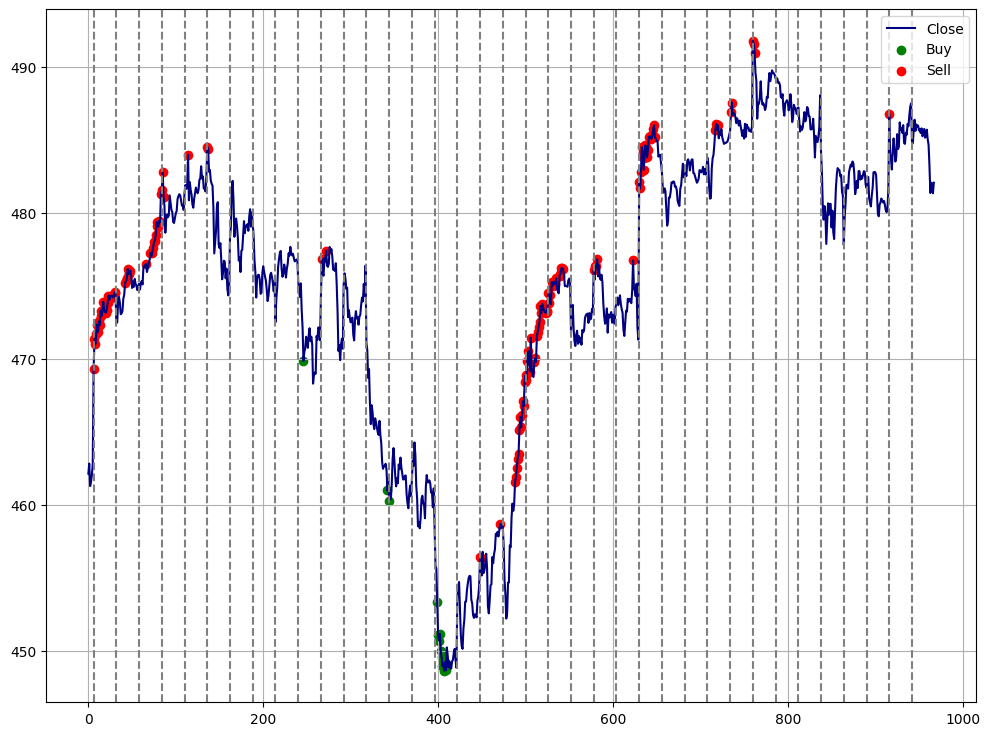

In [9]:
import pylab as pl
from matplotlib import collections  as mc

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,9

df1 = df.iloc[20:].copy()
#lista scatter buy
arrayRSI = []
for x in range(len(df1)):
    if df1.RSI[x] > 27:
        arrayRSI.append(np.nan)
    else:
        arrayRSI.append(df1.Close[x])

sellRSI = []
for x in range(len(df1)):
    if df1.RSI[x] < 65:
        sellRSI.append(np.nan)
    else:
        sellRSI.append(df1.Close[x])


XX = [x for x in range(len(df1))]
yt1 = [x for x in df1.Close]

pl.plot(XX, yt1, color = 'navy', label='Close')
pl.scatter(XX, arrayRSI, color = 'green', label='Buy')
pl.scatter(XX, sellRSI, color = 'red', label='Sell')

# Agregar líneas verticales cuando cambia el día
for i in range(1, len(df1)):
    if df1.index[i].date() != df1.index[i-1].date():
        pl.axvline(x=i, color='gray', linestyle='--')

pl.legend()
pl.grid(True)
pl.show();

In [32]:
# get weekday from '2024-08-14 09:30:00' 
contador = 0
open_price = 0
for x in range(len(df)):
    
    # get open price from '2024-08-14 09:30:00'
    if df.index[x].weekday() == 0 and df.index[x].hour == 9 and df.index[x].minute == 30:
        print('monday: ', df.index[x].date(), df.Open[x])
        open_price = df.Open[x]
        contador += 1
    if df.index[x].weekday() == 2 and df.index[x].hour == 15 and df.index[x].minute == 45:
        print('wednesday: ',df.index[x].date(), df.Close[x])
        if contador == 1:
            print(f'profit: {df.Close[x] - open_price}')
            contador = 0
            open_price = 0

    


wednesday:  2024-08-14 462.82000732421875
monday:  2024-08-19 475.1199951171875
wednesday:  2024-08-21 482.5299987792969
profit: 7.410003662109375
monday:  2024-08-26 479.5799865722656
wednesday:  2024-08-28 471.2799987792969
profit: -8.29998779296875
wednesday:  2024-09-04 460.6000061035156
monday:  2024-09-09 453.1199951171875
wednesday:  2024-09-11 468.45001220703125
profit: 15.33001708984375
monday:  2024-09-16 472.4150085449219
wednesday:  2024-09-18 471.32000732421875
profit: -1.095001220703125
monday:  2024-09-23 482.92999267578125
wednesday:  2024-09-25 485.92999267578125
profit: 3.0
monday:  2024-09-30 485.67999267578125
wednesday:  2024-10-02 481.94000244140625
profit: -3.739990234375
monday:  2024-10-07 485.4200134277344


In [22]:
'2024-08-14' == str(df.index[0].date())

True